## 1. Import libraries

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# 2. EDA

In [38]:
# df = pd.read_csv("data/flood_data.csv")
df = pd.read_csv("data/flood_dataset.csv")
df.head(2)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.223650
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.458924


In [39]:
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.286241
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.101984
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.216073
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.276128
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.345452
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,1.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
df.isna().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

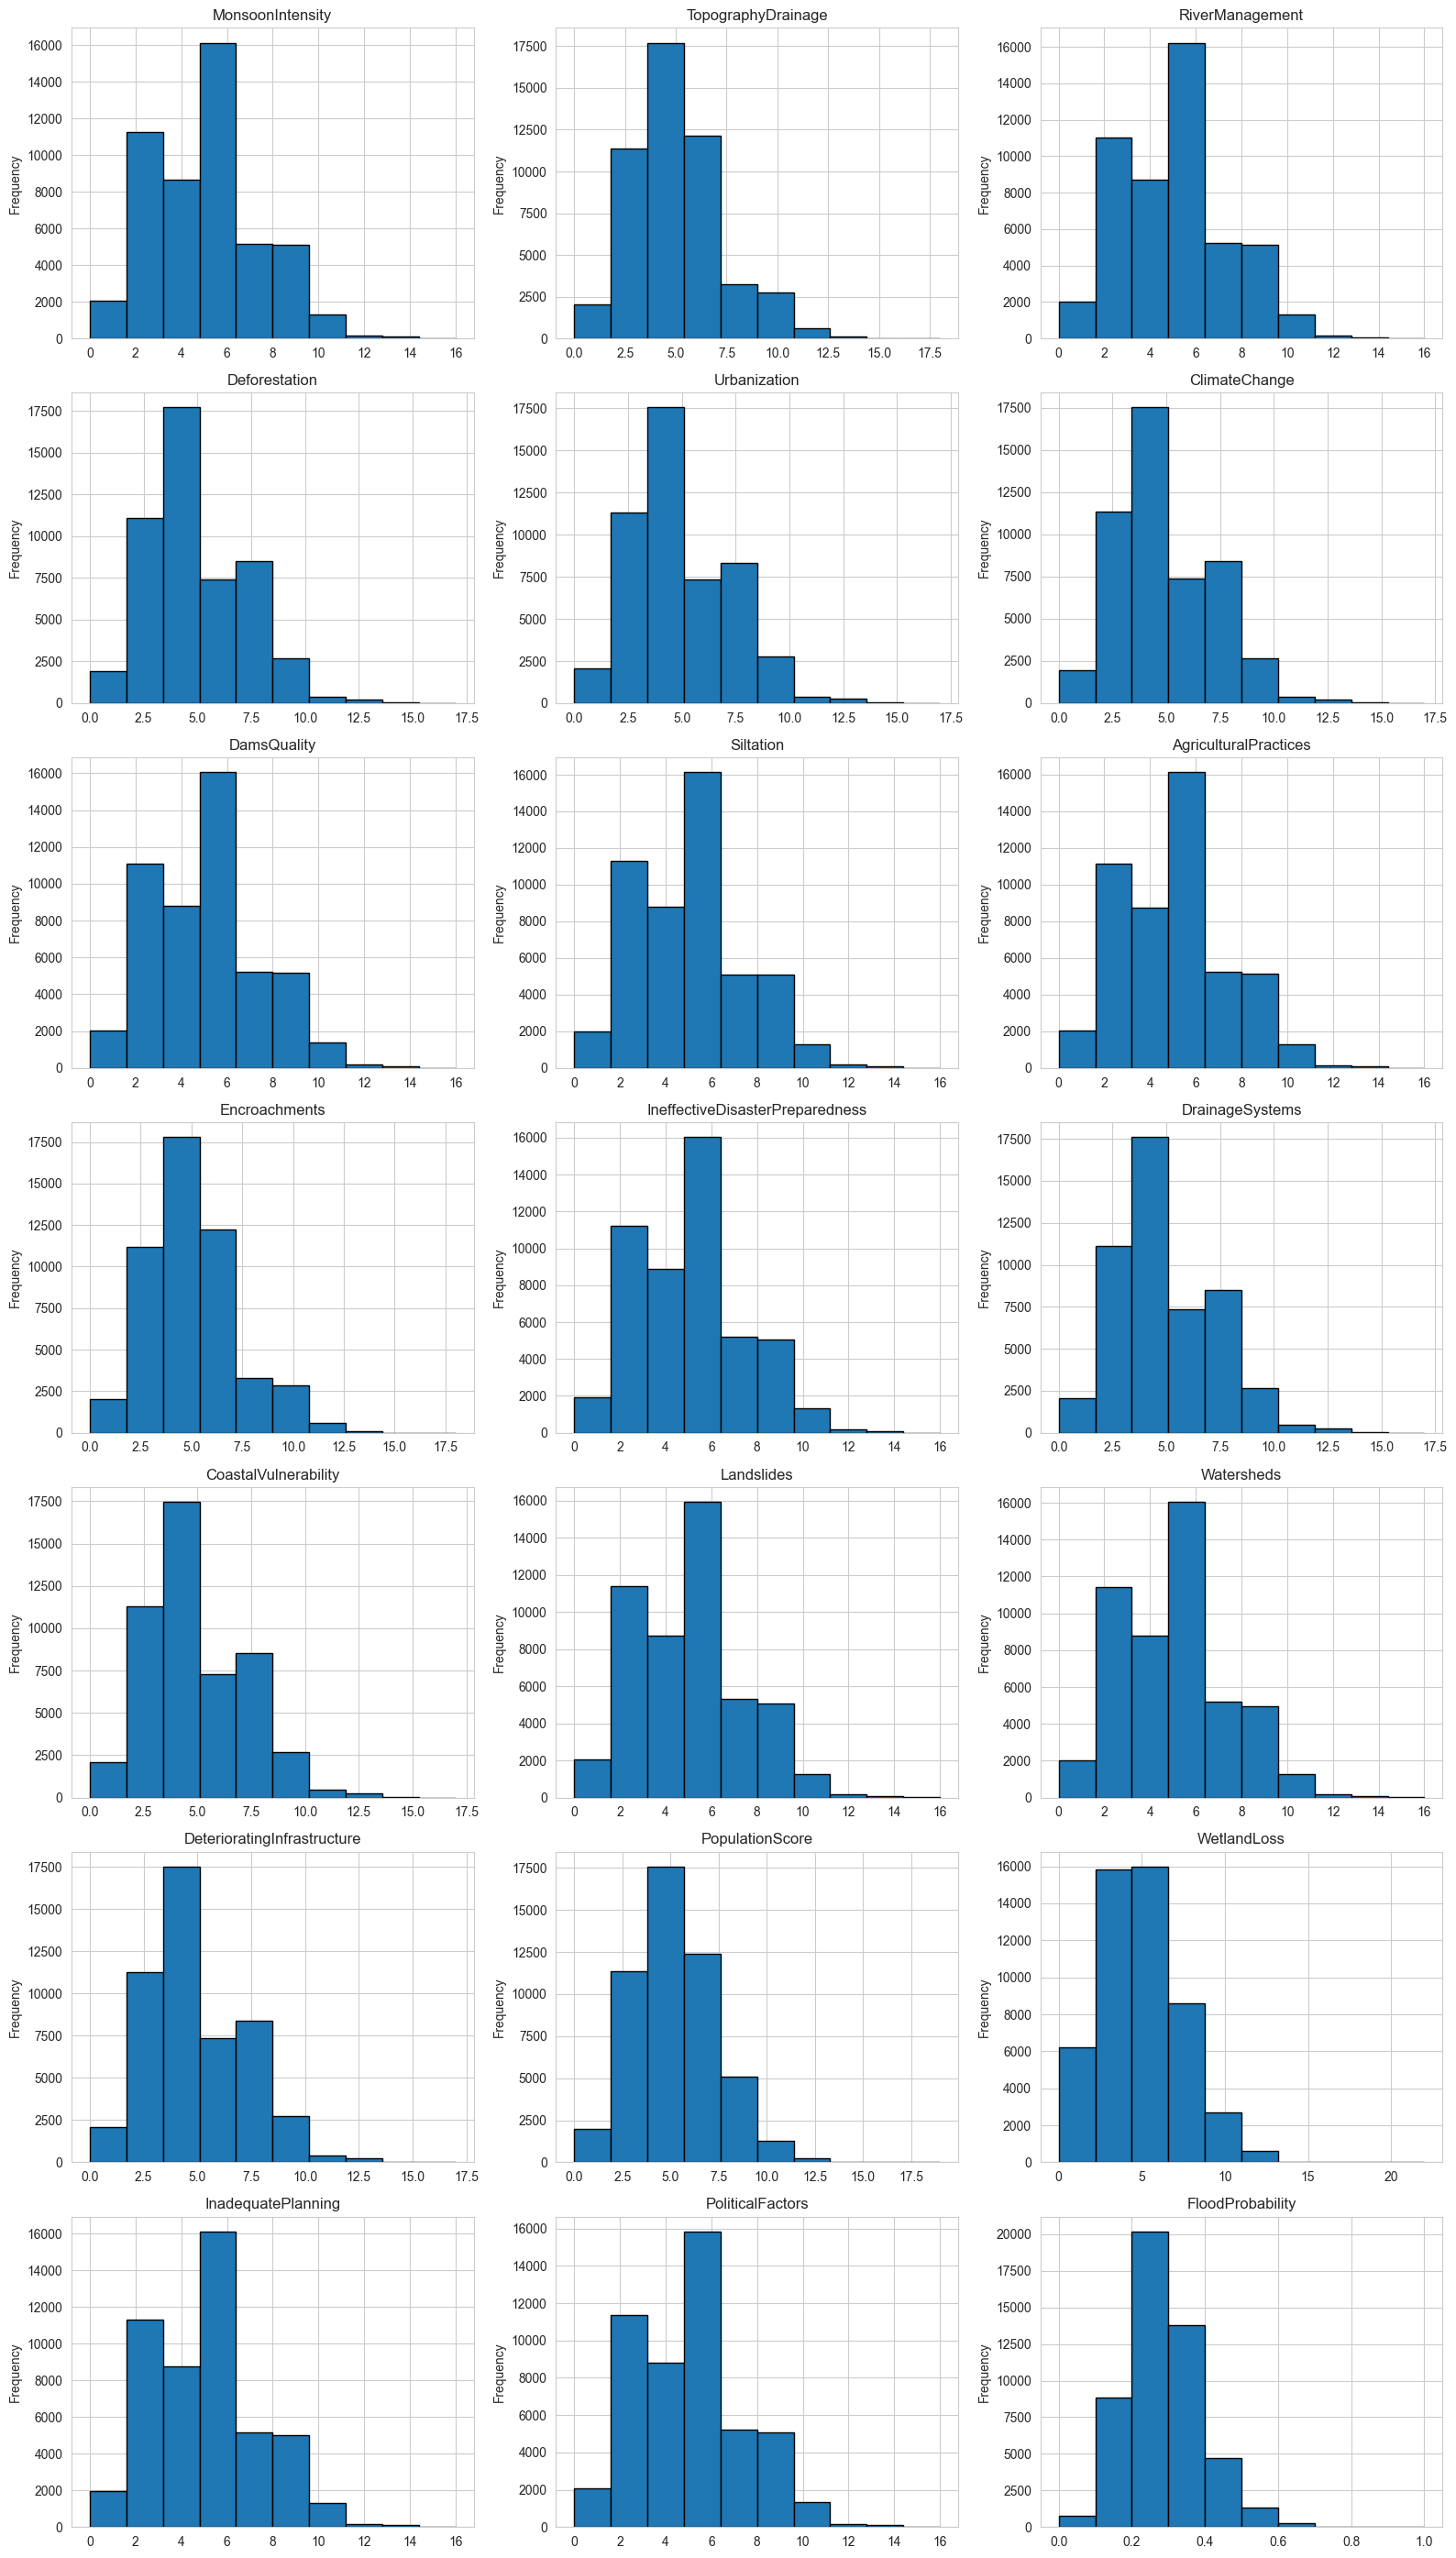

In [43]:
n_cols = 3
n_rows = math.ceil(len(df.columns) / n_cols)
fig, axes = plt.subplots(figsize=(16,4*n_rows), ncols=n_cols, nrows=n_rows)
axes = axes.flatten()
for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=10, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


 # 3. Data preprocessing

## Data engineering

In [44]:
def data_engineer(df):
    df['Water_Capacity'] = df['DrainageSystems'] + df['DamsQuality'] + df['RiverManagement']
    df['Water_Load'] = df['MonsoonIntensity'] + df['ClimateChange'] + df['Siltation']
    df['Hydrological_Balance'] = df['Water_Capacity'] - df['Water_Load']
    human_factors = [
    'Deforestation', 'Urbanization', 'AgriculturalPractices',
    'Encroachments', 'PopulationScore', 'WetlandLoss'
    ]
    df['Anthropogenic_Pressure'] = df[human_factors].mean(axis=1)
    df['Admin_Gridlock'] = df['PoliticalFactors'] * df['InadequatePlanning']
    df['IneffectiveDisasterPreparedness']

    return df

In [45]:
def preprocess_pipeline(X):
    X = data_engineer(X)
    scaler = StandardScaler()
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    X = imputer.fit_transform(X)
    X_scaled = scaler.fit_transform(X)

    return X_scaled

In [46]:
X = df.drop("FloodProbability", axis=1)
y = df["FloodProbability"]

X_preprocessed = preprocess_pipeline(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# 4. Inference

In [62]:
lr = LinearRegression()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()

lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
knn_pred = knn.predict(X_test)
rf_pred = rf.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print(f"LR MSE: {lr_mse}")
print(f"KNN MSE: {knn_mse}")
print(f"RF MSE: {rf_mse}")

LR MSE: 0.002933539393063415
KNN MSE: 0.004160062634323143
RF MSE: 0.0017852138376109846


In [64]:
import pickle
with open("flood_model.pkl", "wb") as f:
    pickle.dump(lr, f)
